In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import time
import datetime as dt
#import json
#import requests
import quandl

In [2]:
df = "master_data_cleaned.csv"
masterdata = pd.read_csv(df)
masterdata.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
0,2016,Apr,2016-4,4/30/2016,4/28/2016,Z2BR,ZHVI 2-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",384884.0,30566.0,3.5,3.88,3.66
1,2016,Apr,2016-4,4/30/2016,4/28/2016,Z4BR,ZHVI 4-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",881951.0,30566.0,3.5,3.88,3.66
2,2016,Apr,2016-4,4/30/2016,4/28/2016,Z5BR,ZHVI 5+ Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",1287769.0,30566.0,3.5,3.88,3.66
3,2016,Apr,2016-4,4/30/2016,4/28/2016,ZATT,ZHVI All Homes- Top Tier Time Series ($),753871,metro,"Breckenridge, CO; CO",842653.0,30566.0,3.5,3.88,3.66
4,2016,Apr,2016-4,4/30/2016,4/28/2016,Z1BR,ZHVI 1-Bedroom Time Series ($),753871,metro,"Breckenridge, CO; CO",243688.0,30566.0,3.5,3.88,3.66


In [3]:
zall_df = masterdata[masterdata["Indicator ID"] == "ZALL"]
zall_df_dropped = zall_df.dropna(how="any")
# zall_df

In [4]:
zall_df['Year-Month'] = zall_df['Year-Month'].apply(pd.to_datetime)
zall_df['Year-Month'] = pd.to_datetime(zall_df['Year-Month'], format='%Y%B')

zall_df.dtypes



<ipython-input-4-e0bbb19b778b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zall_df['Year-Month'] = zall_df['Year-Month'].apply(pd.to_datetime)
<ipython-input-4-e0bbb19b778b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zall_df['Year-Month'] = pd.to_datetime(zall_df['Year-Month'], format='%Y%B')


Year                          int64
Month                        object
Year-Month           datetime64[ns]
Date Zillow                  object
Date Interest                object
Indicator ID                 object
Indicator Name               object
Region ID                     int64
Region Type                  object
Region Name                  object
Value                       float64
County Population           float64
Unemployment Rate           float64
Wells Fargo Rate            float64
Freddie Mac Rate            float64
dtype: object

In [21]:
#CO Data
Population = zall_df.groupby('Year-Month')['County Population'].first()
Unemployment = zall_df.groupby('Year-Month')['Unemployment Rate'].first()
Value = zall_df.groupby('Year-Month')['Value'].mean()
Wells_Rate = zall_df.groupby('Year-Month')['Wells Fargo Rate'].mean()
Freddie_Rate = zall_df.groupby('Year-Month')['Freddie Mac Rate'].mean()
CO_df = pd.DataFrame({
    "Population":Population,
    "Unemployment":Unemployment,
    "Value":Value,
    "Wells Fargo Rate":Wells_Rate,
    "Freddie Mac Rate":Freddie_Rate,
})
CO_df = CO_df.dropna(how="any")
CO_df.head()


,Population,Unemployment,Value,Wells Fargo Rate,Freddie Mac Rate
Year-Month,,,,,
2016-10,30566.0,3.1,354541.50,3.7200,3.470
2016-11,30566.0,3.0,357955.25,4.0325,3.770
2016-12,30566.0,2.9,361369.75,4.4520,4.198
2016-4,30566.0,3.5,339107.75,3.8800,3.660
2016-5,30566.0,3.4,342075.00,3.8150,3.600


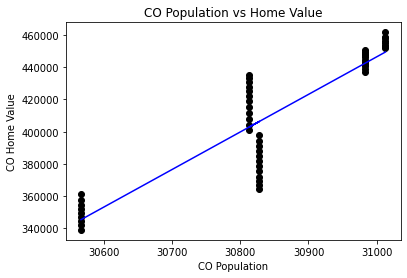

The correlation coefficiant is 0.9
The line equation is: y = 232.42x + -6758659.49


In [22]:
#Relationship between Colorado Home Value and Population
x_axis = CO_df["Population"]
y_axis = CO_df["Value"]
plt.title("CO Population vs Home Value")
plt.xlabel("CO Population")
plt.ylabel("CO Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="black")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"b-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))

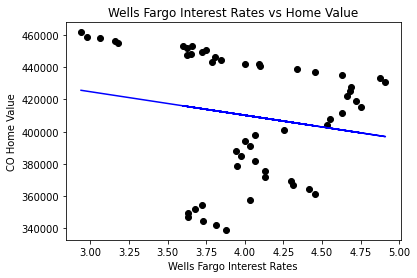

The correlation coefficiant is -0.18
The line equation is: y = -14573.65x + 468505.31


In [23]:
#Relationship between CO Home Value and Freddie Mac Interest Rates
x_axis = CO_df["Wells Fargo Rate"]
y_axis = CO_df["Value"]
plt.title("Wells Fargo Interest Rates vs Home Value")
plt.xlabel("Wells Fargo Interest Rates")
plt.ylabel("CO Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="black")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"b-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))

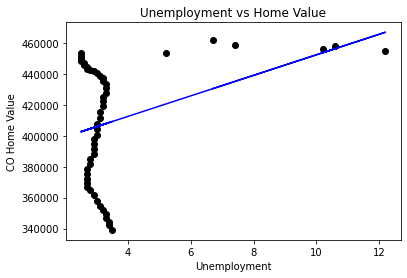

The correlation coefficiant is 0.35
The line equation is: y = 6631.16x + 386012.89


In [24]:
#Relationship between CO Home Value and Unemployment
x_axis = CO_df["Unemployment"]
y_axis = CO_df["Value"]
plt.title("Unemployment vs Home Value")
plt.xlabel("Unemployment")
plt.ylabel("CO Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="black")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"b-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))

In [5]:
#create 3 different city dataframes
Denver_data = zall_df.loc[zall_df['Region Name']=='Denver, CO']
COS_data = zall_df.loc[zall_df['Region Name']=='Colorado Springs, CO']
Greeley_data = zall_df.loc[zall_df['Region Name']=='Greeley, CO']

# Greeley_data


In [6]:
zall_df = masterdata[masterdata["Indicator ID"] == "ZALL"]
# zall_df

In [7]:
masterdata['Year-Month'] = masterdata['Year-Month'].apply(pd.to_datetime)
# masterdata.dtypes

In [8]:
masterdata['Year-Month'] = pd.to_datetime(masterdata['Year-Month'], format='%Y%B')
# masterdata.dtypes
# masterdata_dropped = masterdata.dropna(how="any")
# masterdata_dropped.head()

In [9]:
#formatting the Year-Month column to datetime
Denver_data['Year-Month'] = Denver_data['Year-Month'].apply(pd.to_datetime)
COS_data['Year-Month'] = COS_data['Year-Month'].apply(pd.to_datetime)
Greeley_data['Year-Month'] = Greeley_data['Year-Month'].apply(pd.to_datetime)
# Denver_data.dtypes

In [10]:
#formatting the Year-Month column to datetime
Denver_data['Year-Month'] = pd.to_datetime(Denver_data['Year-Month'], format='%Y%B')
COS_data['Year-Month'] = pd.to_datetime(COS_data['Year-Month'], format='%Y%B')
Greeley_data['Year-Month'] = pd.to_datetime(Greeley_data['Year-Month'], format='%Y%B')
# Denver_data.dtypes

In [11]:
#Sorting the Year-Month column from oldest to most recent
Denver_data = Denver_data.sort_values("Year-Month")
COS_data = COS_data.sort_values("Year-Month")
Greeley_data = Greeley_data.sort_values("Year-Month")
Denver_data.head()

,Year,Month,Year-Month,Date Zillow,Date Interest,Indicator ID,Indicator Name,Region ID,Region Type,Region Name,Value,County Population,Unemployment Rate,Wells Fargo Rate,Freddie Mac Rate
2054,2016,Apr,2016-04-01,4/30/2016,4/28/2016,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",394530,metro,"Denver, CO",357037.0,697744.0,3.5,3.88,3.66
2216,2016,May,2016-05-01,5/31/2016,5/5/2016,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",394530,metro,"Denver, CO",359934.0,697744.0,3.4,3.75,3.61
2217,2016,May,2016-05-01,5/31/2016,5/12/2016,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",394530,metro,"Denver, CO",359934.0,697744.0,3.4,3.75,3.57
2218,2016,May,2016-05-01,5/31/2016,5/19/2016,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",394530,metro,"Denver, CO",359934.0,697744.0,3.4,3.88,3.58
2219,2016,May,2016-05-01,5/31/2016,5/26/2016,ZALL,"ZHVI All Homes (SFR, Condo/Co-op) Time Series ($)",394530,metro,"Denver, CO",359934.0,697744.0,3.4,3.88,3.64


In [12]:
#Need to groupby Year-Month column, 
#grab the first values of population and unemployment (b/c these don't change throughout the month)
#and take the average of columns "value" and interest rates (these have different values throughout the month)
#Denver_Year_Month = Denver_data.groupby('Year-Month')['Values']


#Denver Data
Denver_Population = Denver_data.groupby('Year-Month')['County Population'].first()
Denver_Unemployment = Denver_data.groupby('Year-Month')['Unemployment Rate'].first()
Denver_Value = Denver_data.groupby('Year-Month')['Value'].mean()
Denver_Wells_Rate = Denver_data.groupby('Year-Month')['Wells Fargo Rate'].mean()
Denver_Freddie_Rate = Denver_data.groupby('Year-Month')['Freddie Mac Rate'].mean()
Denver_df = pd.DataFrame({
    "Population":Denver_Population,
    "Unemployment":Denver_Unemployment,
    "Value":Denver_Value,
    "Wells Fargo Rate":Denver_Wells_Rate,
    "Freddie Mac Rate":Denver_Freddie_Rate,
})
Denver_df = Denver_df.dropna(how="any")
Denver_df.head()

,Population,Unemployment,Value,Wells Fargo Rate,Freddie Mac Rate
Year-Month,,,,,
2016-04-01,697744.0,3.5,357037.0,3.880,3.660
2016-05-01,697744.0,3.4,359934.0,3.815,3.600
2016-06-01,697744.0,3.4,362475.0,3.728,3.568
2016-07-01,697744.0,3.3,365470.0,3.630,3.440
2016-08-01,697744.0,3.3,368384.0,3.630,3.434


In [13]:
#Need to groupby Year-Month column, 
#grab the first values of population and unemployment (b/c these don't change throughout the month)
#and take the average of columns "value" and interest rates (these have different values throughout the month)
#Denver_Year_Month = Denver_data.groupby('Year-Month')['Values']


#Colorado Springs Data
COS_Population = COS_data.groupby('Year-Month')['County Population'].first()
COS_Unemployment = COS_data.groupby('Year-Month')['Unemployment Rate'].first()
COS_Value = COS_data.groupby('Year-Month')['Value'].mean()
COS_Wells_Rate = COS_data.groupby('Year-Month')['Wells Fargo Rate'].mean()
COS_Freddie_Rate = COS_data.groupby('Year-Month')['Freddie Mac Rate'].mean()
COS_df = pd.DataFrame({
    "Population":COS_Population,
    "Unemployment":COS_Unemployment,
    "Value":COS_Value,
    "Wells Fargo Rate":COS_Wells_Rate,
    "Freddie Mac Rate":COS_Freddie_Rate,
})
COS_df = COS_df.dropna(how="any")
COS_df.head()

,Population,Unemployment,Value,Wells Fargo Rate,Freddie Mac Rate
Year-Month,,,,,
2016-04-01,689481.0,3.5,241753.0,3.880,3.660
2016-05-01,689481.0,3.4,243141.0,3.815,3.600
2016-06-01,689481.0,3.4,244820.0,3.728,3.568
2016-07-01,689481.0,3.3,246313.0,3.630,3.440
2016-08-01,689481.0,3.3,248101.0,3.630,3.434


In [14]:
#Need to groupby Year-Month column, 
#grab the first values of population and unemployment (b/c these don't change throughout the month)
#and take the average of columns "value" and interest rates (these have different values throughout the month)
#Denver_Year_Month = Denver_data.groupby('Year-Month')['Values']


#Greeley Data
Greeley_Population = Greeley_data.groupby('Year-Month')['County Population'].first()
Greeley_Unemployment = Greeley_data.groupby('Year-Month')['Unemployment Rate'].first()
Greeley_Value = Greeley_data.groupby('Year-Month')['Value'].mean()
Greeley_Wells_Rate = Greeley_data.groupby('Year-Month')['Wells Fargo Rate'].mean()
Greeley_Freddie_Rate = Greeley_data.groupby('Year-Month')['Freddie Mac Rate'].mean()
Greeley_df = pd.DataFrame({
    "Population":Greeley_Population,
    "Unemployment":Greeley_Unemployment,
    "Value":Greeley_Value,
    "Wells Fargo Rate":Greeley_Wells_Rate,
    "Freddie Mac Rate":Greeley_Freddie_Rate,
})
Greeley_df = Greeley_df.dropna(how="any")
Greeley_df.head()

,Population,Unemployment,Value,Wells Fargo Rate,Freddie Mac Rate
Year-Month,,,,,
2016-04-01,294867.0,3.5,288654.0,3.880,3.660
2016-05-01,294867.0,3.4,290891.0,3.815,3.600
2016-06-01,294867.0,3.4,292973.0,3.728,3.568
2016-07-01,294867.0,3.3,294950.0,3.630,3.440
2016-08-01,294867.0,3.3,297389.0,3.630,3.434


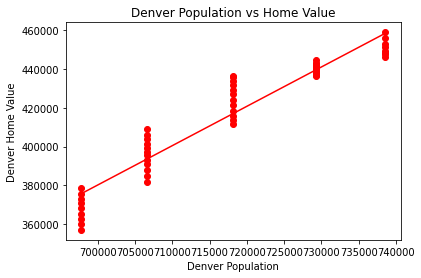

The correlation coefficiant is 0.96
The line equation is: y = 2.03x + -1039561.18


In [15]:
#Relationship between Denver Home Value and Population
x_axis = Denver_df["Population"]
y_axis = Denver_df["Value"]
plt.title("Denver Population vs Home Value")
plt.xlabel("Denver Population")
plt.ylabel("Denver Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="red")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))



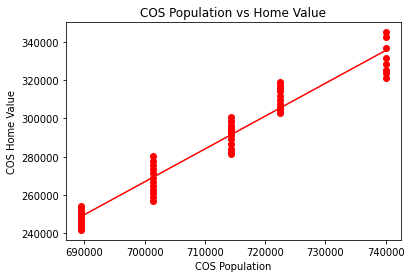

The correlation coefficiant is 0.97
The line equation is: y = 1.72x + -934853.39


In [16]:
#Relationship between Colorado Springs Home Value and Population
x_axis = COS_df["Population"]
y_axis = COS_df["Value"]
plt.title("COS Population vs Home Value")
plt.xlabel("COS Population")
plt.ylabel("COS Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="red")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))


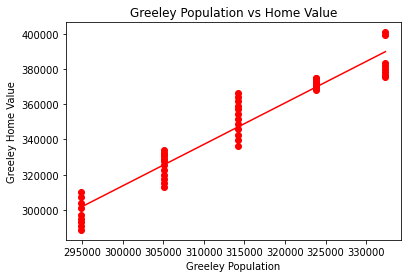

The correlation coefficiant is 0.96
The line equation is: y = 2.35x + -392456.42


In [17]:
#Relationship between Greeley Home Value and Population
x_axis = Greeley_df["Population"]
y_axis = Greeley_df["Value"]
plt.title("Greeley Population vs Home Value")
plt.xlabel("Greeley Population")
plt.ylabel("Greeley Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="red")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))


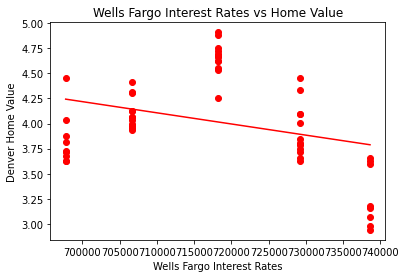

The correlation coefficiant is -0.32
The line equation is: y = -0.0x + 12.01


In [18]:
#Relationship between Denver Home Value and Wells Fargo Interest Rates
x_axis = Denver_df["Population"]
y_axis = Denver_df["Wells Fargo Rate"]
plt.title("Wells Fargo Interest Rates vs Home Value")
plt.xlabel("Wells Fargo Interest Rates")
plt.ylabel("Denver Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="red")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))

#If interest rates rise, it has an effect on the cost of mortgages. This forces home buyers to sell.
#The increase in sellers and decline in buyers will cause home value to fall

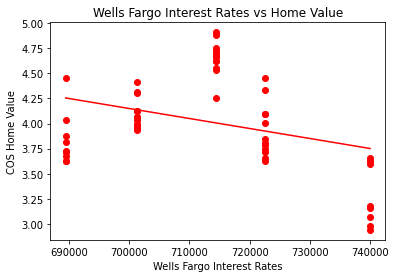

The correlation coefficiant is -0.33
The line equation is: y = -0.0x + 11.13


In [19]:
#Relationship between COS Home Value and Wells Fargo Interest Rates
x_axis = COS_df["Population"]
y_axis = COS_df["Wells Fargo Rate"]
plt.title("Wells Fargo Interest Rates vs Home Value")
plt.xlabel("Wells Fargo Interest Rates")
plt.ylabel("COS Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="red")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))

#If interest rates rise, it has an effect on the cost of mortgages. This forces home buyers to sell.
#The increase in sellers and decline in buyers will cause home value to fall

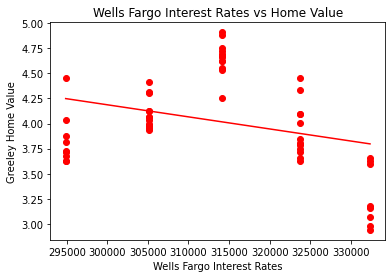

The correlation coefficiant is -0.31
The line equation is: y = -0.0x + 7.8


In [20]:
#Relationship between Greeley Home Value and Wells Fargo Interest Rates
x_axis = Greeley_df["Population"]
y_axis = Greeley_df["Wells Fargo Rate"]
plt.title("Wells Fargo Interest Rates vs Home Value")
plt.xlabel("Wells Fargo Interest Rates")
plt.ylabel("Greeley Home Value")
plt.scatter(x_axis,y_axis, marker="o",color="red")
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_axis, y_axis)
regress_values=x_axis*slope+intercept 
line_eq = "y = " +str(round(slope,2)) + "x + " +str(round(intercept,2))
plt.plot(x_axis,regress_values,"r-")
plt.show()
print("The correlation coefficiant is " +str(round(st.pearsonr(x_axis,y_axis)[0],2)))
print("The line equation is: " +str(line_eq))

#If interest rates rise, it has an effect on the cost of mortgages. This forces home buyers to sell.
#The increase in sellers and decline in buyers will cause home value to fall